In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import MDS

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr, kendalltau

# IRIS Dataset (鳶尾花)

IRIS dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant (Iris setosa, Iris virginica and Iris versicolor).

These data were originally collected in the Gaspé Peninsula by R.A. Fisher in 1936

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
n, D = X.shape
print(f"Number of Data: {n}")
print(f"Data Dimension: {D}")
print(f"Feature Name: {iris.feature_names}")

print(f"Class Name: {target_names}")
print(f"Class Label: {np.unique(y)}")

Number of Data: 150
Data Dimension: 4
Feature Name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Name: ['setosa' 'versicolor' 'virginica']
Class Label: [0 1 2]


In [ ]:
def plot_reduced_dataset(X_raw, X_nor, labels=y, method="PCA"):
    colors = ["navy", "turquoise", "darkorange"]
    titles = ["Unnormalized", "Normalized"]
    plt.figure(figsize=(12, 6))
    for idx, result in enumerate([X_raw, X_nor]):
        plt.subplot(1, 2, idx+1)
        for color, i, target_name in zip(colors, [0, 1, 2], target_names):
            plt.scatter(result[labels==i, 0], result[labels==i, 1],
                        color=colors[i],
                        label=target_name,
                        alpha=0.8,
                        lw=2,
                        )
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        plt.title(f"{method} of {titles[idx]} IRIS dataset");

## 0. Data Preprocessing

### a) Normalization

A common data preprocessing in data science is the normalization and standarlization

**Linear Normalization to Unit Hyper-cube (線性正規化至單位超立方體)**:
Let $X$ be a dataset of interest in $\mathbb{R}^n$.

Denote
* $m\in\mathbb{R}^n$: Component-wise minimum vector among $X$. i.e., $m_i = \min\limits_{x\in X} x_i$
* $M\in\mathbb{R}^n$: Component-wise maximum vector among $X$. i.e., $M_i = \min\limits_{x\in X} x_i$

Then $[m, M] = [m_1, M_1]\times\cdots\times[m_n, M_m]$ is the smallest enclosing hyper-cube containing $X$.

Let $a=[a_i], b=[b_i]\in\mathbb{R}^n$, denote $[a, b] = [a_1, b_1]\times[a_2, b_2]\times\cdots[a_n, b_n]$ be a hyper-cube.


The process

$$
x = [x_i] \mapsto \begin{bmatrix}(b_i-a_i)\cdot\frac{x_i-m_i}{M_i - m_i}+a_i\end{bmatrix}
$$
that sends $x\in X$ into $[a,b]$ is called the data normalization linearly to hyper-cube.

Then, this process sends
* $m\mapsto a$,
* $M\mapsto b$, and,
* Point inside $[m, M]$ is porpotionally mapped to a point in $[a, b]$.

In practical, we set $a_i=0$ and $b_i=1$ for all $i$ to normalize data into unit hyper-cube $[0, 1]^n$.

In [ ]:
# Manual normalization
X_nor = (X-X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

``MinMaxScaler()`` is a convenient function to apply linear normalization if $a_1=\cdots=a_n$ and $b_1=\cdots=b_n$

For ``a``<``b``, ``MinMaxScaler(feature_range=(a, b))`` contains some methods:
* ``.fit()``: Find the data range $[m, M]$
* ``.fit_transform()``: Find the data range $[m, M]$ and transform $X$ into $[a, b]$

* ``.inverse_transform()``: Recover data from $[a, b]$ back to $[m, M]$.

After have been called, we have the following attributes:
* ``scaler.data_min_``: Component-wise minimum vector
* ``scaler.data_max_``: Component-wise maximum vector
* ``.data_range_``: Component-wise data range

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Linear normalization
X_scaled = scaler.fit_transform(X)  # Compute the scale and normalization the data into [0, 1]

In [ ]:
# Basically, two ways lead to the same result
np.allclose(X_nor, X_scaled)

True

### b) Correlation

In [ ]:
X_scaled_corr = np.corrcoef(X_scaled.T)
print(X_scaled_corr)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


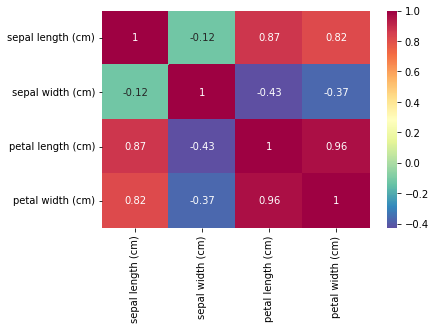

In [ ]:
# Plot the heatmap
sns.heatmap(X_scaled_corr,
            annot=X_scaled_corr,
            cmap='Spectral_r',
            xticklabels=iris.feature_names,
            yticklabels=iris.feature_names);

## 1. PCA

### Determin Dimension Used for PCA

In [ ]:
pca = PCA().fit(X_scaled)
print(f"Explained Variance of Dataset: {pca.explained_variance_ratio_}")

Explained Variance of Dataset: [0.84136038 0.11751808 0.03473561 0.00638592]


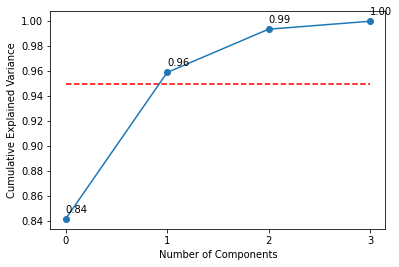

In [ ]:
# Compute cumulative sum of explained variances
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variances
plt.plot(cumulative_var, 'o-')
plt.hlines(0.95, 0, 3, colors='red', linestyles='dashed')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, 4));

# Add text fro each point
for i in np.arange(4):
    plt.text(i, cumulative_var[i]+5e-3, f"{cumulative_var[i]:.2f}")

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)

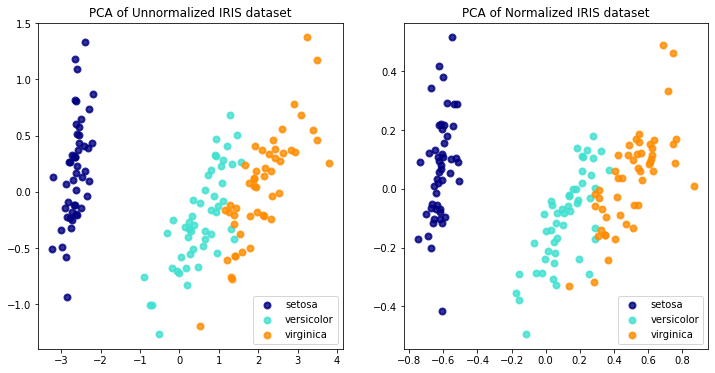

In [ ]:
plot_reduced_dataset(X_pca, X_scaled_pca, method="PCA")

## 2. LDA

In [ ]:
lda = LDA(n_components=2)
X_r2 = lda.fit(X_scaled, y).transform(X_scaled)
X_scaled_r2 = lda.fit(X_scaled, y).transform(X_scaled)

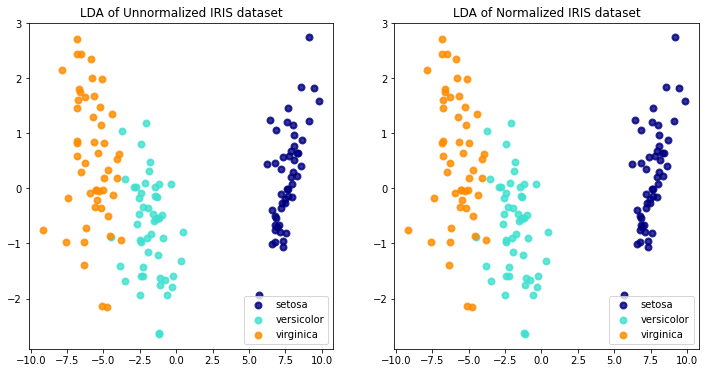

In [ ]:
plot_reduced_dataset(X_r2, X_scaled_r2, method="LDA")

## 3. MDS

### Using Euclidean distance

In [ ]:
mds = MDS(n_components=2)
X_2d = mds.fit_transform(X)
X_scaled_2d = mds.fit_transform(X_scaled)

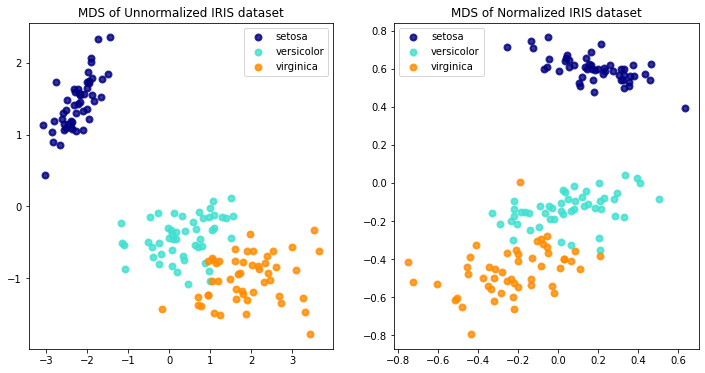

In [ ]:
plot_reduced_dataset(X_2d, X_scaled_2d, method="MDS")

### Using Precomputed distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances as d2
from sklearn.metrics.pairwise import manhattan_distances as d1
from sklearn.metrics.pairwise import cosine_distances as cos_d

In [ ]:
mds_dis = MDS(n_components=2, dissimilarity="precomputed")
dis_L2 = mds_dis.fit_transform(d2(X_scaled))
dis_L1 = mds_dis.fit_transform(d1(X_scaled))
dis_cos = mds_dis.fit_transform(cos_d(X_scaled))

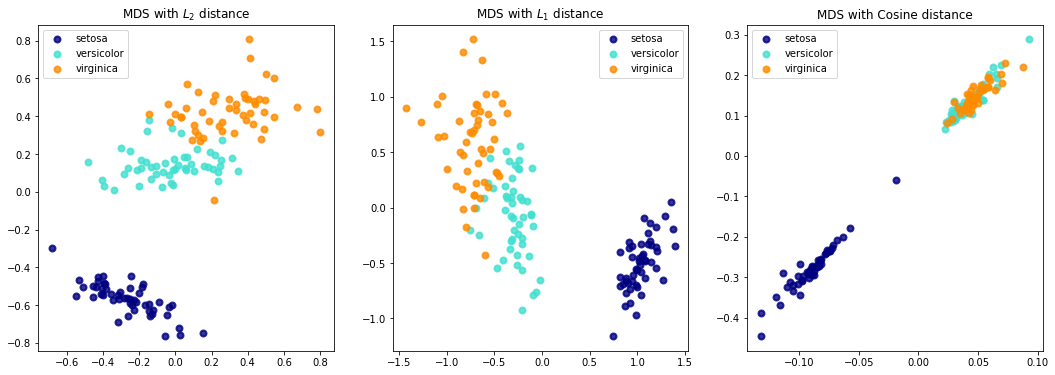

In [ ]:
colors = ["navy", "turquoise", "darkorange"]
titles = [r"$L_2$", r"$L_1$", "Cosine"]
plt.figure(figsize=(18, 6))
for idx, result in enumerate([dis_L2, dis_L1, dis_cos]):
    plt.subplot(1, 3, idx+1)
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(result[y==i, 0], result[y==i, 1],
                    color=colors[i],
                    label=target_name,
                    alpha=0.8,
                    lw=2,
                    )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title(f"MDS with {titles[idx]} distance");